In [29]:
#importing the required libraries.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
df = pd.read_csv('test.csv', na_values='?')
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df.dropna()
## #data preprocessing 
#convert categorical to numerical Gender,Customer Type, Type of Travel,Class

df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)


print(df.head())
print(df['satisfaction'].value_counts())

      id  Age  Flight Distance  Inflight wifi service  \
0  19556   52              160                      5   
1  90035   36             2863                      1   
2  12360   20              192                      2   
3  77959   44             3377                      0   
4  36875   49             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3              1   
2                                  0                       2              4   
3                                  0                       0              2   
4                                  3                       4              3   

   Food and drink  Online boarding  Seat comfort  ...  Inflight service  \
0               3                4             3  ...                 5   
1               5               

In [23]:
attr = df.drop(columns = ['satisfaction', 'id'])
target = df['satisfaction']
attr.head()
#target.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,2,5,5,50,44.0,False,False,False,True,False
1,36,2863,1,1,3,1,5,4,5,4,...,3,4,5,0,0.0,False,False,False,False,False
2,20,192,2,0,2,4,2,2,2,2,...,2,2,2,0,0.0,True,True,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,3,1,4,0,6.0,True,False,False,False,False
4,49,1182,2,3,4,3,4,1,2,2,...,4,2,4,0,20.0,False,False,False,True,False


In [30]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0.576923,0.026050,1.0,0.8,0.6,0.75,0.6,0.8,0.50,1.0,...,0.25,1.0,1.0,0.044326,0.039462,0.0,0.0,0.0,1.0,0.0
1,0.371795,0.571890,0.2,0.2,0.6,0.00,1.0,0.8,1.00,0.8,...,0.50,0.8,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.166667,0.032512,0.4,0.0,0.4,0.75,0.4,0.4,0.25,0.4,...,0.25,0.4,0.4,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0
3,0.474359,0.675687,0.0,0.0,0.0,0.25,0.6,0.8,0.75,0.2,...,0.50,0.2,0.8,0.000000,0.005381,1.0,0.0,0.0,0.0,0.0
4,0.538462,0.232431,0.4,0.6,0.8,0.50,0.8,0.2,0.25,0.4,...,0.75,0.4,0.8,0.000000,0.017937,0.0,0.0,0.0,1.0,0.0


In [ ]:
import random
random_state=55
random.seed(random_state )  # Set the seed
# random.seed()
print(random.randint(1, 100))  # Generates a random number

12


In [32]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.3, random_state =random_state , shuffle = True)
target_train.head()
attr_train.head()
target_test.head()

21667                  satisfied
10183                  satisfied
11255    neutral or dissatisfied
23248    neutral or dissatisfied
13825    neutral or dissatisfied
Name: satisfaction, dtype: object

In [33]:
from sklearn.metrics import accuracy_score
k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
     
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
     
    accuracy = accuracy_score(target_test,target_pred ) 
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')

Accuracy of model with k = 3: 0.9195417095777549

Accuracy of model with k = 5: 0.9164521112255407

Accuracy of model with k = 10: 0.9105303810504635



In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[4220  112]
 [ 583 2853]]

Accuracy score
0.9105303810504635

Classification Report
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.97      0.92      4332
              satisfied       0.96      0.83      0.89      3436

               accuracy                           0.91      7768
              macro avg       0.92      0.90      0.91      7768
           weighted avg       0.92      0.91      0.91      7768



In [38]:
test_actual=attr_test
test_actual['target_pred']=target_pred
test_actual['test_actual']=target_test
freq_table =pd.crosstab( test_actual['test_actual'], test_actual['target_pred'])
print("Confusion Matrix")
print(freq_table)

Confusion Matrix
target_pred              neutral or dissatisfied  satisfied
test_actual                                                
neutral or dissatisfied                      878        470
satisfied                                    653        465


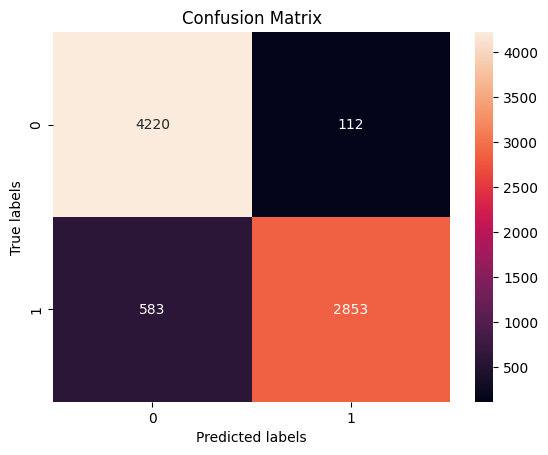

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
